<a href="https://colab.research.google.com/github/sshresth09/FeynnProject2/blob/main/Feynn_Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
uberdata = pd.read_csv('uber.csv')

In [ ]:
print(uberdata.columns)

In [4]:
dimensions = uberdata.shape
print(dimensions)
print(uberdata.head(3))

(200000, 9)
         ID      key  fare_amount          pickup_datetime  pickup_longitude  \
0  24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1  27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2  44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC        -74.005043   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.738354         -73.999512         40.723217                1  
1        40.728225         -73.994710         40.750325                1  
2        40.740770         -73.962565         40.772647                1  


In [5]:
col_means = np.round(uberdata.mean(), 2)

<ipython-input-5-571bd2181721>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_means = np.round(mcdonalds.mean(), 2)


<Axes: >

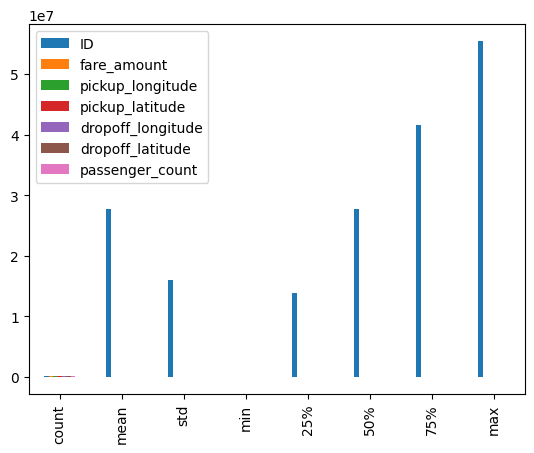

In [6]:
stats = uberdata.describe()
stats.plot(kind='bar')

In [7]:
import pandas as pd
MD_x = uberdata.iloc[:, :11].values
MD_x = (MD_x == "Yes").astype(int)

col_means = np.mean(MD_x, axis=0)
col_means_rounded = np.round(col_means, decimals=2)

np.random.seed(1234)

from sklearn.cluster import KMeans
k_range = range(2, 9)
n_rep = 10
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

print(inertias)

<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)
<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)
<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)
<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)
<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)
<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<ipython-input-7-d11b7972c0e8>:17: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(MD_x)


In [8]:
import random
random.seed(1234)

from sklearn.cluster import KMeans

n_clusters = range(2, 9)
n_init = 10
verbose = 0

MD_kmeans = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=n_init, verbose=verbose).fit(MD_x)
    MD_kmeans.append(kmeans)

<ipython-input-8-75d7b5582f42>:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, n_init=n_init, verbose=verbose).fit(MD_x)
<ipython-input-8-75d7b5582f42>:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, n_init=n_init, verbose=verbose).fit(MD_x)
<ipython-input-8-75d7b5582f42>:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, n_init=n_init, verbose=verbose).fit(MD_x)
<ipython-input-8-75d7b5582f42>:12: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n, n_init=n_init, verbose=verbose).fit(MD_x)
<ipython-input-8-75d7b5582f42>:12: ConvergenceWarning: Numbe

In [9]:
import numpy as np

MD_kmeans_relabeled = []
for kmeans in MD_kmeans:
    labels = kmeans.labels_
    counts = np.bincount(labels)
    order = np.argsort(counts)[::-1]
    new_labels = np.zeros_like(labels)
    for i, j in enumerate(order):
        new_labels[labels == j] = i
    kmeans.labels_ = new_labels
    MD_kmeans_relabeled.append(kmeans)

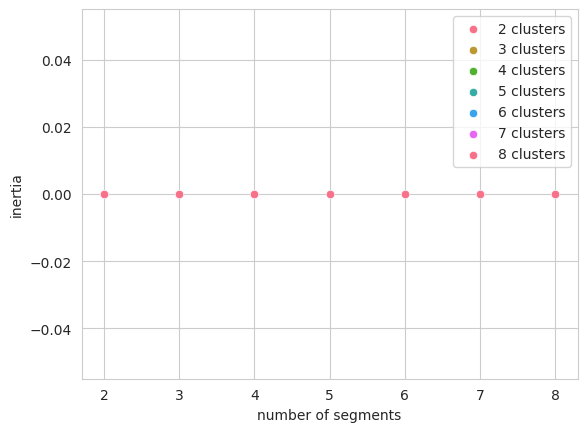

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, kmeans in enumerate(MD_kmeans_relabeled):
    sns.scatterplot(x=range(2, 9), y=kmeans.inertia_, label=f"{i+2} clusters")
plt.gca().set_xlabel("number of segments")
plt.gca().set_ylabel("inertia")
plt.show()


In [12]:
import random
random.seed(1234)


from sklearn.cluster import KMeans
from sklearn.utils import resample
import numpy as np

cluster_range = range(2, 9)
n_rep = 10
n_boot = 100

def kmeans_bootstrap(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans

bootstrap_results = []
for k in cluster_range:
    k_bootstrap_results = []
    for _ in range(n_rep):
      data_bootstrap = resample(MD_x, n_samples=n_boot, random_state=_)
      kmeans = kmeans_bootstrap(data_bootstrap, k)
      k_bootstrap_results.append(kmeans)
    bootstrap_results.append(k_bootstrap_results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-09abdd65b24a>:16: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-09abdd65b24a>:16: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The def

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

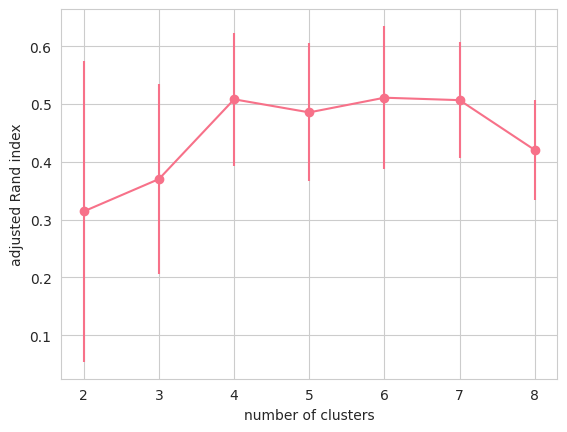

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
MD_x = np.random.randn(100, 4)

def kmeans_bootstrap(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans

cluster_range = range(2, 9)

n_rep = 10
n_boot = 100

bootstrap_results = []
for k in cluster_range:
    k_bootstrap_results = []
    for _ in range(n_rep):
        data_bootstrap = resample(MD_x, n_samples=n_boot, random_state=_)
        kmeans = kmeans_bootstrap(data_bootstrap, k)
        k_bootstrap_results.append(kmeans)
    bootstrap_results.append(k_bootstrap_results)

ari_results = np.zeros((len(cluster_range), n_rep))
for i, k in enumerate(cluster_range):
    for j in range(n_rep):
        kmeans = bootstrap_results[i][j]
        labels_true = KMeans(n_clusters=k, random_state=0).fit(MD_x).labels_
        labels_pred = kmeans.predict(MD_x)
        ari_results[i, j] = adjusted_rand_score(labels_true, labels_pred)

ari_mean = np.mean(ari_results, axis=1)
ari_std = np.std(ari_results, axis=1)

plt.errorbar(cluster_range, ari_mean, yerr=ari_std, fmt='-o')
plt.xlabel('number of clusters')
plt.ylabel('adjusted Rand index')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


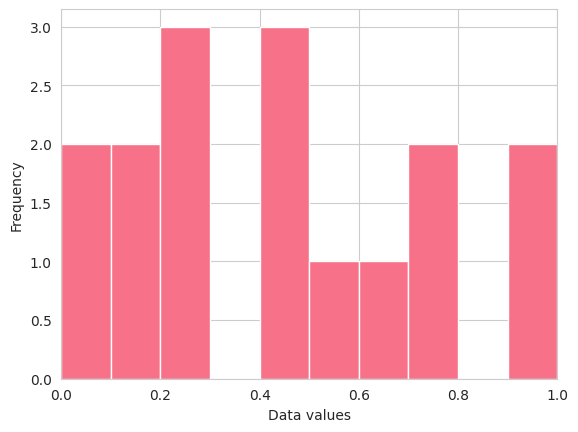

In [14]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
MD_x = np.random.randn(100, 4)

kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_x)
MD_kmeans_labels = kmeans.labels_

segment_data = MD_x[MD_kmeans_labels == 0, 0]
plt.hist(segment_data, bins=np.linspace(0, 1, 11))
plt.xlim(0, 1)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()